In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("delhi_air_quality_feature_store_processed.csv")

With this dataset, we can explore several interesting avenues of analysis, both for a deeper understanding of each variable individually and for the relationships between them. Here are some valuable types of analysis you will perform in this notebook:


### 1. **Exploratory Data Analysis (EDA)**
   - **Descriptive Statistics**: Summarize each variable using mean, median, min, max, and standard deviation to understand the central tendency and spread.
   - **Distribution Analysis**: Plot histograms or KDEs for variables like temperature, humidity, and AQI to visualize their distributions and spot outliers.
   - **Correlation Analysis**: Check the correlations between meteorological variables (like temperature, pressure) and pollutant levels (like PM2.5, AQI) to see if weather 
   patterns influence air quality.

### 2. **Time Series Analysis**
   - **Trend Analysis**: Examine trends in air quality indicators (e.g., AQI, PM2.5, PM10) over time to understand if pollution levels have increased, decreased, or remained constant.
   - **Seasonal Variation**: Analyze seasonal patterns by breaking down data by month, season, or year. This can reveal how air quality and weather conditions change throughout the year.
   - **Hourly Patterns**: Investigate how variables change throughout the day. For example, you might find daily cycles in temperature, AQI, or specific pollutants.

### 3. **Spatial Analysis**
   - **Location-Based Pollution Comparison**: Analyze and compare AQI and pollutant levels across different locations to identify the most and least polluted areas.
   - **Mapping Pollution Hotspots**: If you map the data, you could visualize pollution hotspots in Delhi, perhaps with heatmaps for PM2.5, PM10, or AQI.

### 4. **Pollution and Weather Relationship Analysis**
   - **Impact of Weather on Pollution**: Use scatter plots and regression models to explore how temperature, humidity, wind speed, and pressure influence pollutant levels. For instance, high temperatures and low wind speeds might correlate with higher pollutant concentrations.
   - **Wind Direction and Pollution**: Analyze how wind direction affects pollution at different locations. Some locations may receive more pollutants when the wind blows from a specific direction.

### 5. **Health and Environmental Risk Analysis**
   - **AQI Category Distribution**: Categorize AQI values into levels (e.g., Good, Moderate, Unhealthy) to determine how often each location experiences hazardous air quality.
   - **Pollutant Contribution to AQI**: Break down AQI by individual pollutants to see which pollutants contribute the most to poor air quality.

### 6. **Trend Change Detection**
   - **Yearly and Monthly Changes**: Calculate year-over-year and month-over-month changes in AQI and individual pollutants to track how air quality is improving or deteriorating.
   - **Event-Based Analysis**: Check for changes in pollutant levels around significant events, such as lockdowns, festivals, or changes in traffic regulations.

### 7. **Anomaly Detection**
   - **Identify Outliers**: Spot outlier readings for pollutants or weather variables. For example, sudden spikes in PM2.5 or unusual temperature readings could indicate specific incidents like industrial activities or weather events.
   - **Pattern Deviation**: Use techniques like moving averages to detect deviations from usual trends, which could signal pollution incidents or equipment issues.

If you’d like, I can help you get started on any of these analyses or provide code snippets to guide you through specific steps!

## Let's Start with EDA

In [3]:
print("First few rows of the data:")
display(df.head())

First few rows of the data:


,location_id,city,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
0,"Delhi Institute of Tool Engineering, Wazirpur,...",Wazirpur,2000-03-15 13:44:28.651396,30.450,74.100,990.425,0.300,21.7,252.0,332.0,62.4,4.8,22.4,35.7,332.0
1,"Satyawati College, Delhi, Delhi, India",Delhi,2000-03-15 13:44:28.651396,26.675,74.350,980.650,1.375,55.3,256.0,234.0,59.2,11.9,2.1,33.8,256.0
2,"ITI Shahdra, Jhilmil Industrial Area, Delhi, D...",Jhilmil,2000-03-15 13:44:28.651396,28.775,62.925,984.350,0.300,221.3,265.0,210.0,48.3,5.1,8.2,35.1,265.0
3,"Sonia Vihar Water Treatment Plant DJB, Delhi, ...",Sonia Vihar,2000-03-15 13:44:28.651396,26.575,78.525,991.300,0.300,313.6,251.0,177.0,16.5,1.8,1.7,24.9,251.0
4,"PGDAV College, Sriniwaspuri, Delhi, Delhi, India",Sriniwaspuri,2000-03-15 13:44:28.651396,22.300,71.425,985.650,0.300,347.1,282.0,347.0,43.1,5.2,3.4,29.9,347.0


In [4]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
location_id        0
city               0
event_timestamp    0
temperature        0
humidity           0
pressure           0
wind_speed         0
wind_direction     0
pm25               0
pm10               0
no2                0
so2                0
o3                 0
co                 0
aqi                0
dtype: int64


In [5]:
# Check if any column contains NaN values
contains_na = df.isna().any()
# Print the result
print(contains_na)

location_id        False
city               False
event_timestamp    False
temperature        False
humidity           False
pressure           False
wind_speed         False
wind_direction     False
pm25               False
pm10               False
no2                False
so2                False
o3                 False
co                 False
aqi                False
dtype: bool


In [6]:
print("\nColumn names and data types:")
print(df.dtypes)


Column names and data types:
location_id         object
city                object
event_timestamp     object
temperature        float64
humidity           float64
pressure           float64
wind_speed         float64
wind_direction     float64
pm25               float64
pm10               float64
no2                float64
so2                float64
o3                 float64
co                 float64
aqi                float64
dtype: object


#### Convert event_timestamp to a Datetime Object
Since event_timestamp is currently an object, we need to convert it to a datetime type to allow for easier time-based analysis.

In [7]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
location_id                object
city                       object
event_timestamp    datetime64[ns]
temperature               float64
humidity                  float64
pressure                  float64
wind_speed                float64
wind_direction            float64
pm25                      float64
pm10                      float64
no2                       float64
so2                       float64
o3                        float64
co                        float64
aqi                       float64
dtype: object


#### Summary Statistics
Now, let's generate summary statistics for the numerical columns to get a sense of the distribution of each variable.
This will give us information like the mean, standard deviation, minimum, and maximum values for each numeric variable, which can help identify potential outliers.
Summary statistics help identify potential outliers by providing insights into the spread and central tendencies of the data.

1. Mean and Median:
Outliers can significantly skew the mean (average) but have less effect on the median. If the mean is substantially different from the median, it may indicate the presence of outliers.

2. Standard Deviation:
Standard deviation measures the spread of data around the mean. A high standard deviation suggests the data points are spread out, while a low standard deviation indicates they are closer to the mean. Extreme outliers can inflate the standard deviation, making it larger than expected for a normally distributed dataset.

3. Minimum and Maximum:
By examining the minimum and maximum values, you can quickly spot any data points that are unusually high or low compared to typical ranges.

4. Interquartile Range (IQR):
The IQR, which can be derived from the summary statistics, is the range between the 25th (Q1) and 75th percentiles (Q3). Outliers are often defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [8]:
print("\nSummary statistics for numerical columns:")
display(df.describe())


Summary statistics for numerical columns:


,event_timestamp,temperature,humidity,pressure,wind_speed,wind_direction,pm25,pm10,no2,so2,o3,co,aqi
count,2921413,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06,2.921413e+06
mean,2012-06-09 18:56:36.295726080,2.967448e+01,5.972461e+01,9.839373e+02,5.755100e-01,1.662748e+02,2.428436e+02,2.525172e+02,2.742289e+01,6.990574e+00,2.870380e+01,1.887028e+01,2.846162e+02
min,2000-03-15 13:44:28.651396,2.050000e+01,3.830000e+01,9.647500e+02,1.000000e-01,2.000000e-01,1.700000e+02,1.090000e+02,3.700000e+00,2.000000e-01,5.000000e-01,1.000000e-01,1.430000e+02
25%,2006-03-19 12:44:28.651395968,2.710000e+01,4.400000e+01,9.805000e+02,3.000000e-01,6.330000e+01,1.950000e+02,1.610000e+02,1.510000e+01,3.800000e+00,4.400000e+00,8.200000e+00,2.000000e+02
50%,2012-06-24 18:44:28.651396096,3.007500e+01,5.260000e+01,9.846850e+02,3.000000e-01,1.713080e+02,2.270000e+02,1.900000e+02,2.540000e+01,7.500000e+00,1.780000e+01,1.380000e+01,2.430000e+02
75%,2018-06-09 17:44:28.651396096,3.269100e+01,7.602500e+01,9.878000e+02,6.750000e-01,2.450000e+02,2.740000e+02,3.240000e+02,3.470000e+01,9.500000e+00,3.530000e+01,2.840000e+01,3.250000e+02
max,2024-11-05 13:44:28.651396,3.575000e+01,9.400000e+01,9.964000e+02,3.300000e+00,3.554000e+02,4.670000e+02,9.300000e+02,9.080000e+01,2.020000e+01,1.178000e+02,6.930000e+01,9.300000e+02
std,NaN,3.519299e+00,1.742223e+01,6.239824e+00,4.821382e-01,1.020129e+02,6.004317e+01,1.442264e+02,1.745550e+01,3.724060e+00,3.025712e+01,1.545748e+01,1.280330e+02


Some columns (like temperature, humidity, pressure, and pollution metrics) may have outliers.
We’ll use visualizations like histograms and box plots to analyze the distributions and identify any anomalies.

Methods to detect outliers:
1. Box Plot Method (IQR):
A box plot is a great tool to visually detect outliers. It shows the quartiles of the data and any values outside the whiskers (typically 1.5 * IQR from Q1 or Q3) are considered potential outliers.
2. Z-Score Method:
The Z-score measures how far a value is from the mean in terms of standard deviations. A Z-score above a certain threshold (typically 3) suggests the data point is an outlier.


Number of outliers in each numerical column:
temperature            0
humidity               0
pressure           95891
wind_speed        335654
wind_direction         0
pm25               54771
pm10              160201
no2               141808
so2                10820
o3                349243
co                115596
aqi               184746
dtype: int64


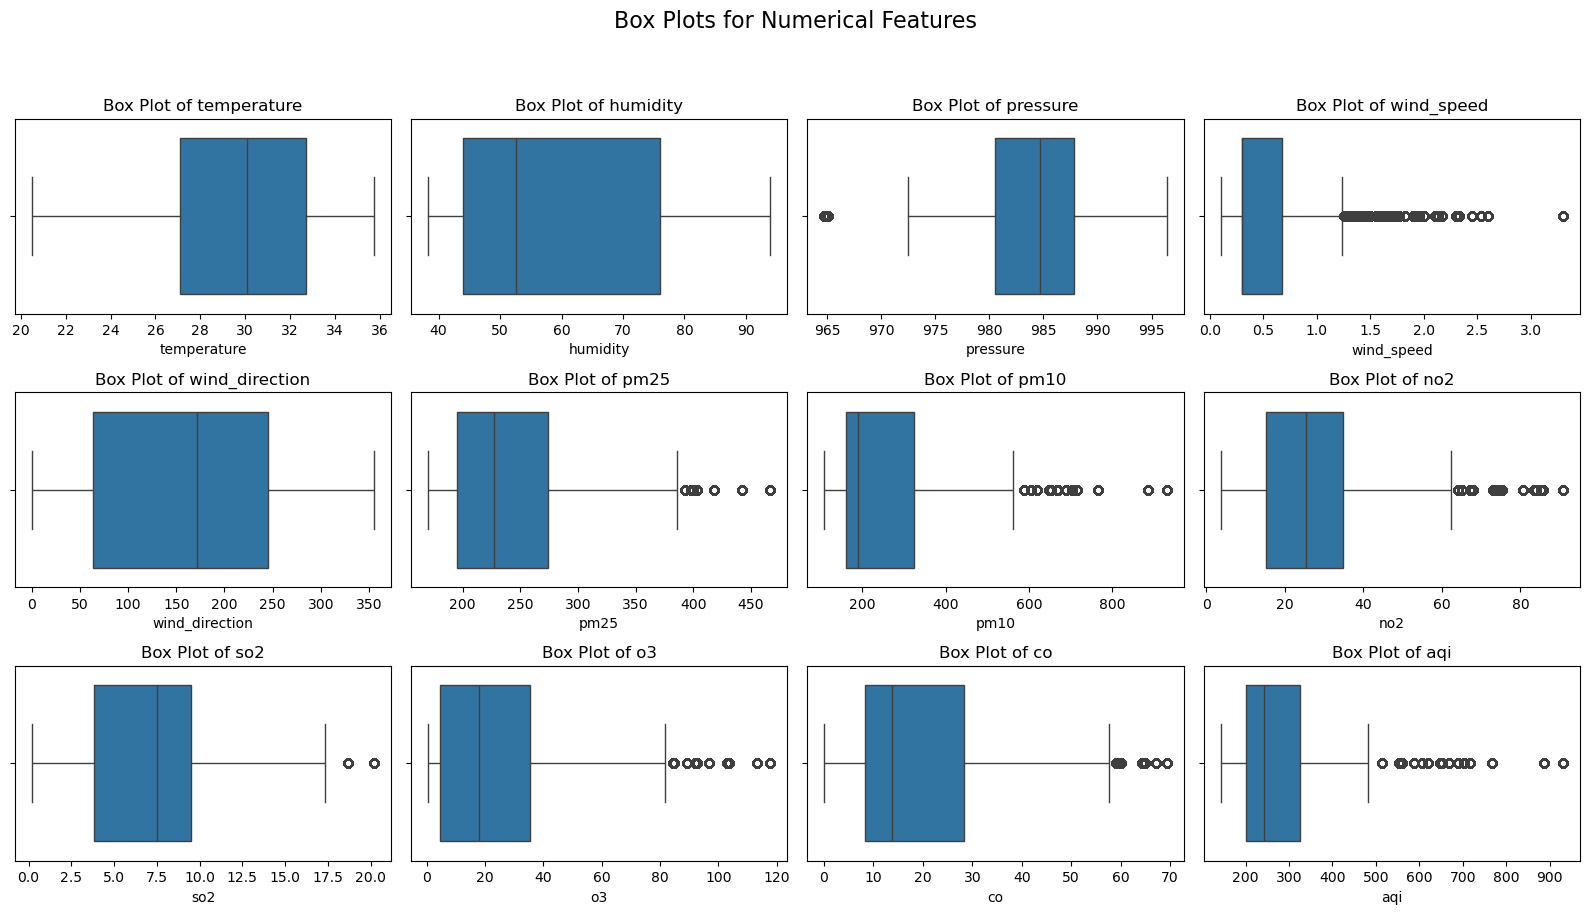

In [9]:
#Box Plot

import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values by filling with the column median (or any other strategy)
numeric_cols = numeric_cols.fillna(numeric_cols.median())

# Calculate IQR and detect outliers
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).sum()

print("Number of outliers in each numerical column:")
print(outliers)

# Plot box plots for each numerical column
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=numeric_cols, x=col)
    plt.title(f"Box Plot of {col}")
plt.suptitle("Box Plots for Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


This code performs the following tasks:

### 1. **Selecting Numeric Columns:**
   ```python
   numeric_cols = df.select_dtypes(include=['float64', 'int64'])
   ```
   - This line selects only the numeric columns from the DataFrame `df`, including columns with data types `float64` and `int64`. These are typically used for continuous or discrete numeric data, excluding categorical data or objects.

### 2. **Handling Missing Values:**
   ```python
   numeric_cols = numeric_cols.fillna(numeric_cols.median())
   ```
   - This line handles missing values (NaNs) in the numeric columns. The missing values are filled with the **median** of each respective column. This is a common strategy for dealing with missing values, as the median is less sensitive to outliers than the mean.

### 3. **Calculating IQR (Interquartile Range):**
   ```python
   Q1 = numeric_cols.quantile(0.25)
   Q3 = numeric_cols.quantile(0.75)
   IQR = Q3 - Q1
   ```
   - **Q1 (25th percentile)** and **Q3 (75th percentile)** are computed using the `quantile()` method. These represent the lower and upper bounds of the middle 50% of the data.
   - **IQR (Interquartile Range)** is then calculated as the difference between Q3 and Q1, which is a measure of statistical spread.

### 4. **Defining Outlier Thresholds:**
   ```python
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   ```
   - **Lower Bound** and **Upper Bound** are defined using the standard formula for outlier detection based on IQR:
     - Any data point below `Q1 - 1.5 * IQR` is considered a **lower outlier**.
     - Any data point above `Q3 + 1.5 * IQR` is considered an **upper outlier**.
     - The factor `1.5` is a commonly used multiplier for outlier detection.

### 5. **Identifying Outliers:**
   ```python
   outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).sum()
   ```
   - This line identifies outliers by checking if any value in `numeric_cols` falls outside the defined lower or upper bounds.
   - The condition `(numeric_cols < lower_bound) | (numeric_cols > upper_bound)` returns a boolean DataFrame where `True` indicates an outlier.
   - `.sum()` is then used to count the number of `True` values (i.e., outliers) in each column.

### 6. **Printing the Number of Outliers:**
   ```python
   print("Number of outliers in each numerical column:")
   print(outliers)
   ```
   - This prints the number of outliers detected in each numeric column.

### 7. **Creating Box Plots:**
   ```python
   plt.figure(figsize=(16, 12))
   for i, col in enumerate(numeric_cols.columns, 1):
       plt.subplot(4, 4, i)
       sns.boxplot(data=numeric_cols, x=col)
       plt.title(f"Box Plot of {col}")
   plt.suptitle("Box Plots for Numerical Features", fontsize=16)
   plt.tight_layout(rect=[0, 0.03, 1, 0.95])
   plt.show()
   ```
   - This block of code creates a **box plot** for each numerical column in `numeric_cols` to visually detect outliers:
     - `plt.figure(figsize=(16, 12))` sets the size of the overall figure.
     - `plt.subplot(4, 4, i)` creates a subplot grid of 4 rows and 4 columns (total 16 plots), and each subplot is filled with the box plot of a column.
     - `sns.boxplot(data=numeric_cols, x=col)` creates a box plot for each column `col`.
     - `plt.title(f"Box Plot of {col}")` sets the title for each individual box plot.
     - `plt.suptitle("Box Plots for Numerical Features", fontsize=16)` sets the overall title for the figure.
     - `plt.tight_layout(rect=[0, 0.03, 1, 0.95])` adjusts the layout to prevent overlap of titles and labels.
     - `plt.show()` displays the plot.


Results we analyzed from the box plot:
From the box plots in the image, here are some key observations for each feature:

1. **Temperature**: The temperature values are mostly within a narrow range, without significant outliers, indicating stable temperature data.
  
2. **Humidity**: The humidity values are also within a reasonable range without major outliers, suggesting consistency in humidity data.

3. **Pressure**: There is a slight presence of outliers on the lower side, but most of the values fall within a standard range.

4. **Wind Speed**: Wind speed has a high number of outliers, especially on the higher end, indicating that there are some instances of higher wind speeds that deviate from the average range.

5. **Wind Direction**: Wind direction values are distributed across a broad range without any outliers, suggesting a variety of wind directions without extreme cases.

6. **PM2.5**: There are numerous high outliers for PM2.5 levels, indicating sporadic spikes in particulate matter concentrations.

7. **PM10**: Similar to PM2.5, PM10 has several high outliers, suggesting occasional increases in particulate levels.

8. **NO2**: There are many high outliers in NO2 concentration, indicating that certain readings have significantly elevated NO2 levels.

9. **SO2**: There are a few outliers on the higher end for SO2, showing occasional spikes in sulfur dioxide concentration.

10. **O3**: Ozone (O3) levels show several high outliers, suggesting fluctuations with occasional peaks in concentration.

11. **CO**: Carbon monoxide (CO) levels have no significant outliers, indicating stable readings across the dataset.

12. **AQI**: The Air Quality Index (AQI) shows several high outliers, indicating sporadic periods of poor air quality.

In summary, several pollutants (PM2.5, PM10, NO2, O3) and the AQI have notable outliers, suggesting instances of elevated pollution levels in the data. Wind speed also shows considerable variation with high outliers, while other features such as temperature, humidity, and pressure are relatively stable.

In [10]:
#Z-Score 

from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(df.select_dtypes(include=['float64']))

# Set a threshold for Z-scores to classify outliers
outlier_threshold = 3

# Identify outliers
outlier_indices = (abs(z_scores) > outlier_threshold).sum(axis=0)
print(f"Number of outliers based on Z-score (threshold={outlier_threshold}):")
print(outlier_indices)


Number of outliers based on Z-score (threshold=3):
temperature            0
humidity               0
pressure           95891
wind_speed         54236
wind_direction         0
pm25               18735
pm10              113342
no2                55934
so2                10820
o3                     0
co                 24775
aqi               118369
dtype: int64


Ok from these analysis we got to know, that we need to make alot many changes in the data, before using it for any type of model

Lets first analyze the data, afterward we will make changes in the data 

Spatial Analysis
To analyze the pollution levels across different locations and visualize pollution hotspots, we can follow these steps: \n

A. Location-Based Pollution Comparison:
Objective: Compare AQI and pollutant lUnderstood! It's crucial to conduct a thorough analysis of the data before making any changes, especially when dealing with environmental data like pollution and weather metrics. Here’s a breakdown of how we can approach each type of analysis you've mentioned. We can use visualization, statistical techniques, and even machine learning methods where necessary.

### 3. **Spatial Analysis**
To analyze the pollution levels across different locations and visualize pollution hotspots, we can follow these steps:

#### A. **Location-Based Pollution Comparison**:
   - **Objective**: Compare AQI and pollutant levels across different locations to identify polluted areas.
   - **Method**:
     - **Group data** by location (latitude and longitude or specific location names) and calculate the mean/median AQI and pollutant levels.
     - Use **bar charts or boxplots** to compare AQI levels across different locations.
     - We can also use **pivot tables** to aggregate AQI by location.


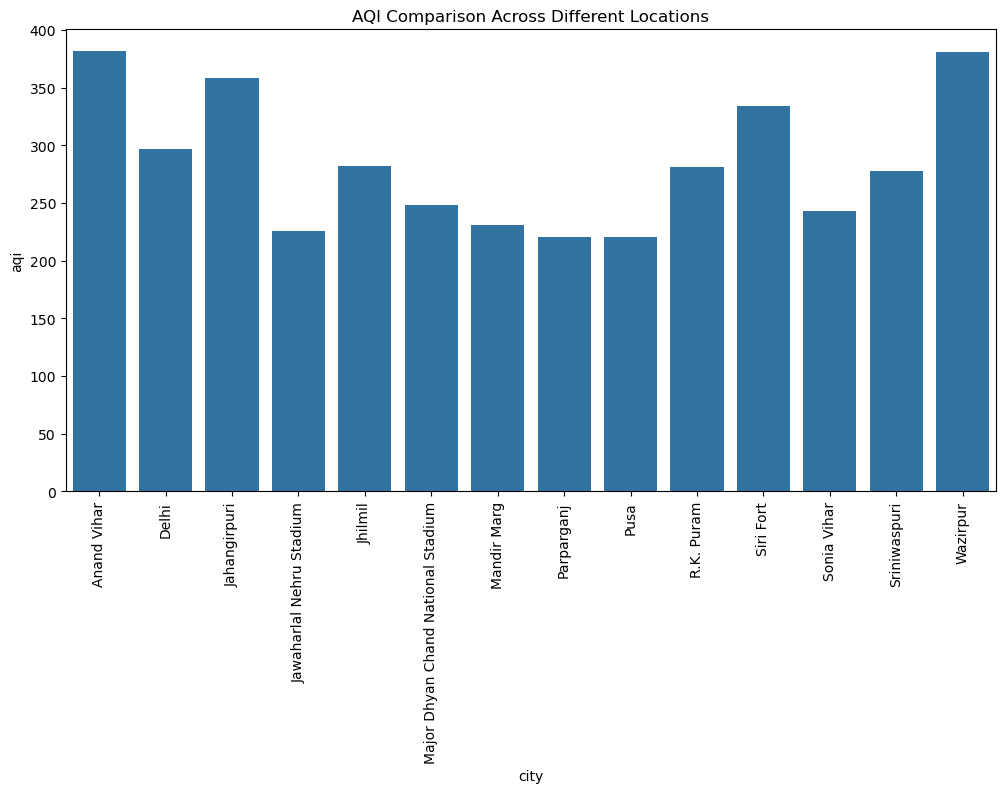

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by location and calculate mean AQI and pollutants
location_comparison = df.groupby('city')[['aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='aqi', data=location_comparison)
plt.xticks(rotation=90)
plt.title('AQI Comparison Across Different Locations')
plt.show()


Here we can analyze that Anand Vihar and Wazipur have the most aqi

### **Pollution and Weather Relationship Analysis**

#### A. **Impact of Weather on Pollution**:
   - **Objective**: Explore how weather conditions (temperature, humidity, wind speed, and pressure) affect pollutant levels.
   - **Method**:
     - Use **scatter plots** to visualize relationships between weather features and pollution.
     - Perform **correlation analysis** to quantify the strength of these relationships.
     - Fit **regression models** to understand the impact of multiple weather variables on pollutants.


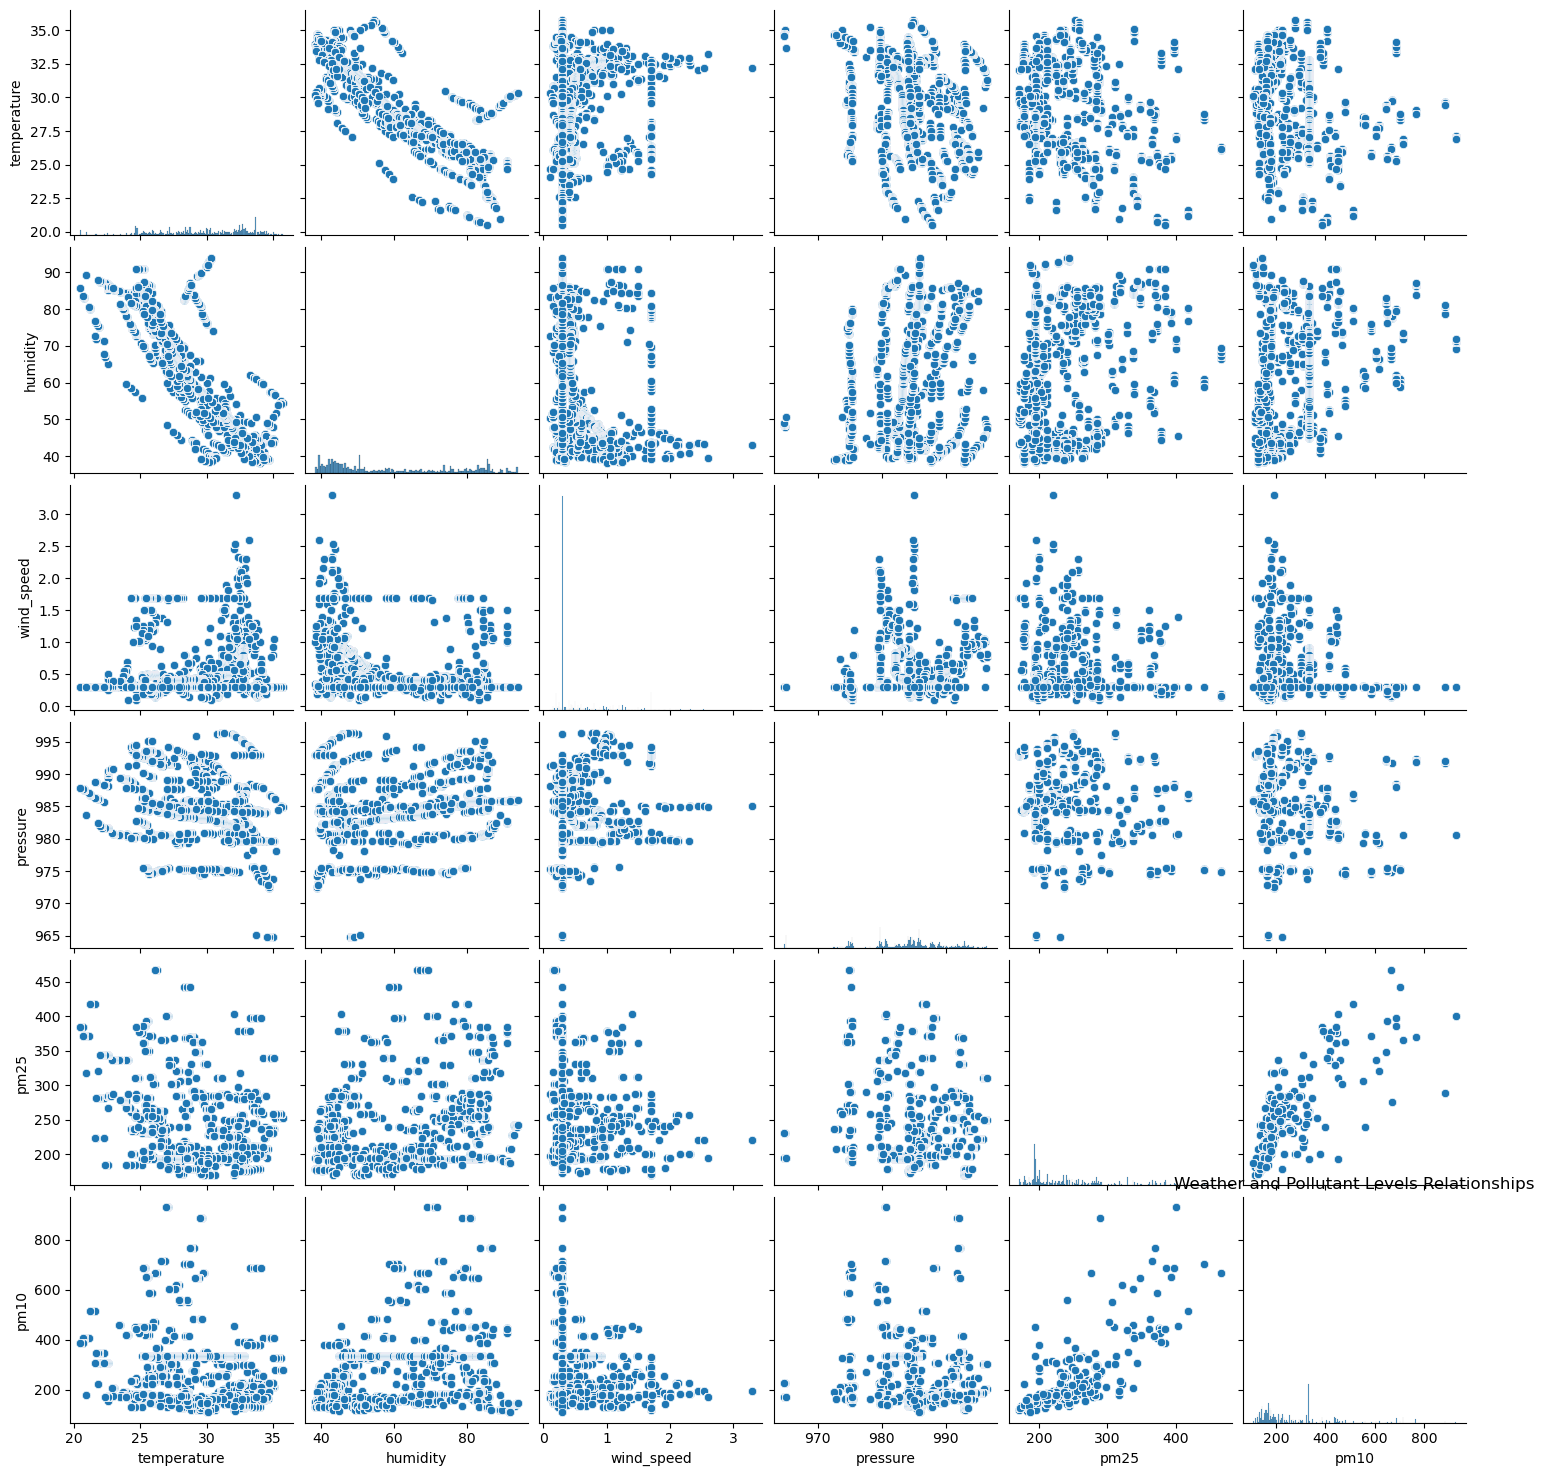

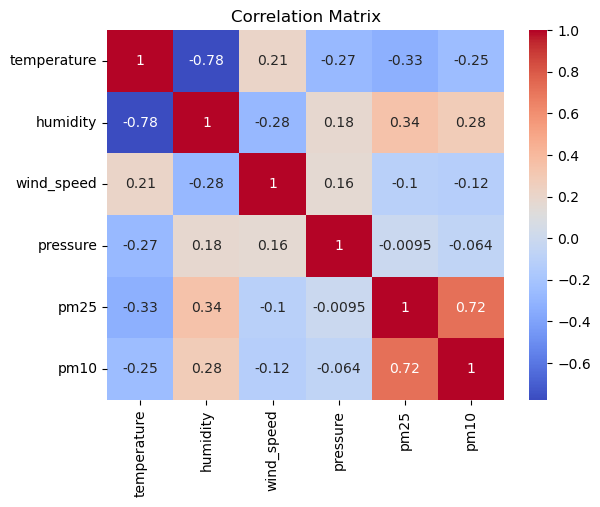

In [12]:
# Scatter plots for weather vs pollutant levels
sns.pairplot(df[['temperature', 'humidity', 'wind_speed', 'pressure', 'pm25', 'pm10']])
plt.title('Weather and Pollutant Levels Relationships')
plt.show()

# Correlation matrix to identify strong correlations
correlation_matrix = df[['temperature', 'humidity', 'wind_speed', 'pressure', 'pm25', 'pm10']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


What we analyzed is 


1. **Temperature and Humidity**: There is a strong negative correlation between temperature and humidity (-0.78). This indicates that as temperature increases, humidity tends to decrease, which aligns with typical weather patterns.

2. **Temperature and Pollutants**:
   - Temperature has a mild negative correlation with PM2.5 (-0.33) and PM10 (-0.25), suggesting that higher temperatures may slightly reduce particulate matter concentrations. This could be due to increased atmospheric dispersion or other seasonal factors.

3. **Humidity and Pollutants**:
   - Humidity has a positive correlation with PM2.5 (0.34) and PM10 (0.28), suggesting that higher humidity levels might be associated with increased particulate matter levels. This could be because humid air can carry more particulates or because humidity can cause particles to clump together, making them easier to detect.

4. **Wind Speed and Pollutants**:
   - Wind speed has a weak negative correlation with PM2.5 (-0.10) and PM10 (-0.12). This suggests that higher wind speeds might slightly help disperse particulate matter, though the effect is minimal.

5. **Pressure and Pollutants**:
   - Pressure has very low correlations with pollutants, with values close to zero (e.g., -0.0095 with PM2.5 and -0.064 with PM10). This implies that pressure does not significantly impact particulate matter concentrations.

6. **PM2.5 and PM10**:
   - There is a strong positive correlation (0.72) between PM2.5 and PM10, which is expected, as both are types of particulate matter and often increase or decrease together.

### Summary:
- **Temperature** and **humidity** have a strong inverse relationship.
- **Humidity** shows a positive association with particulate matter (PM2.5 and PM10), while **temperature** shows a slight negative association.
- **Wind speed** has a weak inverse relationship with pollutant levels, indicating a slight dispersal effect.
- **PM2.5** and **PM10** are strongly correlated, as both pollutants often share similar sources and dispersion patterns.

This matrix helps identify which weather factors might influence air quality, but further analysis would be required to establish causative relationships.
Pressure and Pollutants:

Pressure has very low correlations with pollutants, with values close to zero (e.g., -0.0095 with PM2.5 and -0.064 with PM10). This implies that pressure does not significantly impact particulate matter concentrations.
PM2.5 and PM10:

There is a strong positive correlation (0.72) between PM2.5 and PM10, which is expected, as both are types of particulate matter and often increase or decrease together

#### B. **Wind Direction and Pollution**:
   - **Objective**: Analyze how different wind directions affect pollutant levels at different locations.
   - **Method**:
     - Use **scatter plots** or **line plots** to visualize the effect of wind direction on pollutants like PM2.5, PM10, etc.
     - Calculate the **mean pollutant levels** for each wind direction to see if there's a pattern.

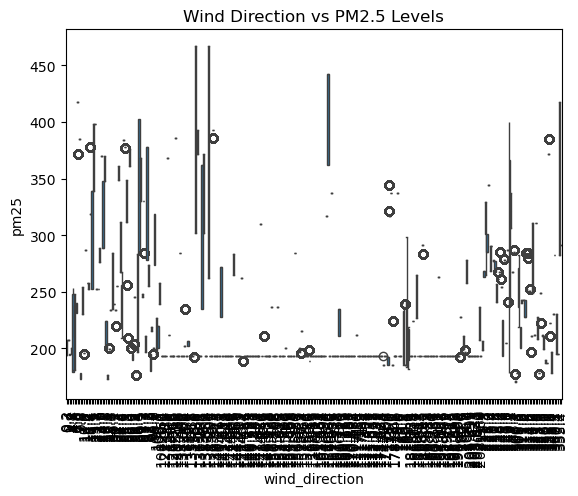

In [13]:
# Plotting wind direction vs pollutant levels (e.g., PM2.5)
sns.boxplot(x='wind_direction', y='pm25', data=df)
plt.title('Wind Direction vs PM2.5 Levels')
plt.xticks(rotation=90)
plt.show()


### 5. **Trend Change Detection**

#### A. **Yearly and Monthly Changes**:
   - **Objective**: Track the changes in AQI and pollutants over the years and months to observe improvements or deteriorations in air quality.
   - **Method**:
     - Group data by year and month and calculate mean AQI and pollutant levels.
     - Plot **line graphs** to show year-over-year or month-over-month changes.

Let's check the effect of all the feature on the value of AQI which will be our target variable in the model

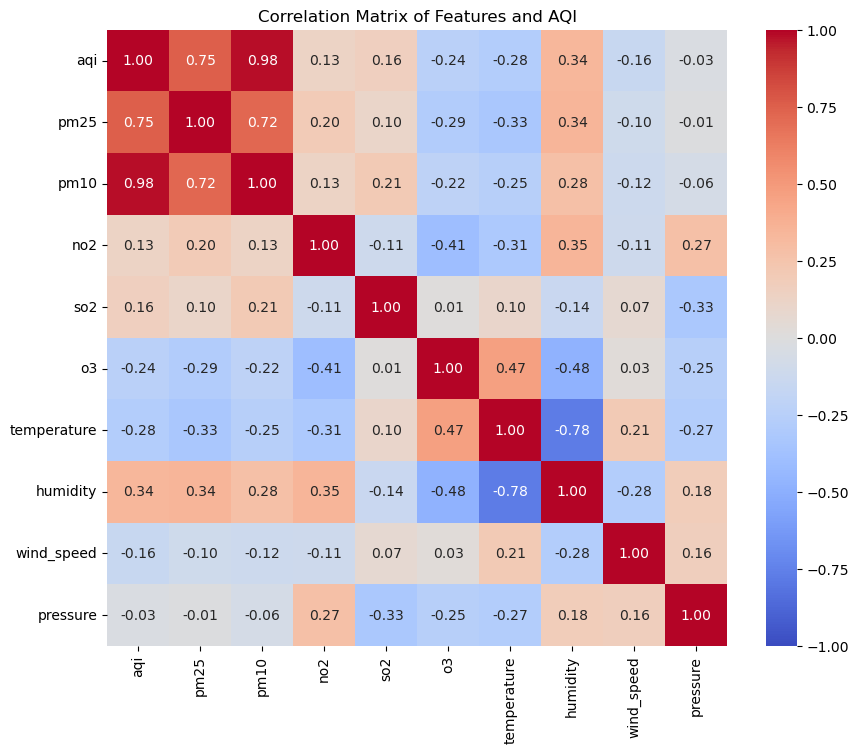

In [15]:
#heatmap which tells the correaltion between all the other vars with aqi 
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the features and AQI
correlation_matrix = df[['aqi', 'pm25', 'pm10', 'no2', 'so2', 'o3', 'temperature', 'humidity', 'wind_speed', 'pressure']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Features and AQI')
plt.show()
